In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('s01.csv')
y = pd.read_csv('s01-labels.csv')
len(X) == len(y)

True

In [10]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,-13264.0635,-4582.4902,2579.0974,38326.6758,32381.4668,48940.5352,15849.2383,18270.7461,0.149898
1,-13269.1309,-4593.6016,2573.1770,38317.7695,32369.5820,48931.4570,15836.7900,18253.0566,0.149898
2,-13273.2139,-4605.6841,2568.5500,38311.6914,32362.0918,48929.1172,15828.9092,18241.4609,0.149898
3,-13274.0752,-4613.3335,2566.8176,38310.9609,32361.0469,48933.2656,15828.9639,18239.5801,0.149898
4,-13271.2578,-4613.1226,2568.2290,38315.7617,32365.7402,48941.4141,15836.2490,18245.9199,0.149898
...,...,...,...,...,...,...,...,...,...
264995,-19717.2207,-292.7995,10293.4004,37476.1367,35616.9414,50949.9414,12079.5850,18626.0059,0.181844
264996,-19717.7285,-294.7468,10293.2900,37477.4141,35619.3125,50952.9805,12080.2080,18625.9668,0.181865
264997,-19715.0449,-293.1339,10296.5615,37481.3594,35625.2070,50957.9922,12087.1963,18630.6895,0.181886
264998,-19713.4023,-292.0264,10298.5459,37483.4063,35629.8555,50961.3359,12095.8535,18635.8926,0.181906


In [11]:
y

,Emotions
0,4
1,4
2,4
3,4
4,4
...,...
264995,3
264996,3
264997,3
264998,3


In [12]:
y.value_counts()

Emotions
1           86001
3           65720
2           45507
6           45499
5           15307
0            6950
4              16
dtype: int64

In [ ]:
# classes are a bit imbalanced, if I had more time I would balance these classes

In [13]:
# random state used as better for testing
# stratified used to partially account for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [15]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [16]:
y_pred_test = forest.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred_test)

0.998822641509434

In [31]:
labels = [0, 1, 2, 3, 4, 5, 6]
confusion_matrix(y_test, y_pred_test, labels=labels)

array([[ 1727,     6,     2,     2,     0,     0,     0],
       [    9, 21481,     0,     0,     0,     0,    10],
       [    0,     0, 11377,     0,     0,     0,     0],
       [    1,     0,     0, 16414,     0,    15,     0],
       [    0,     0,     1,     0,     3,     0,     0],
       [    0,     0,     0,    24,     0,  3803,     0],
       [    0,     8,     0,     0,     0,     0, 11367]])

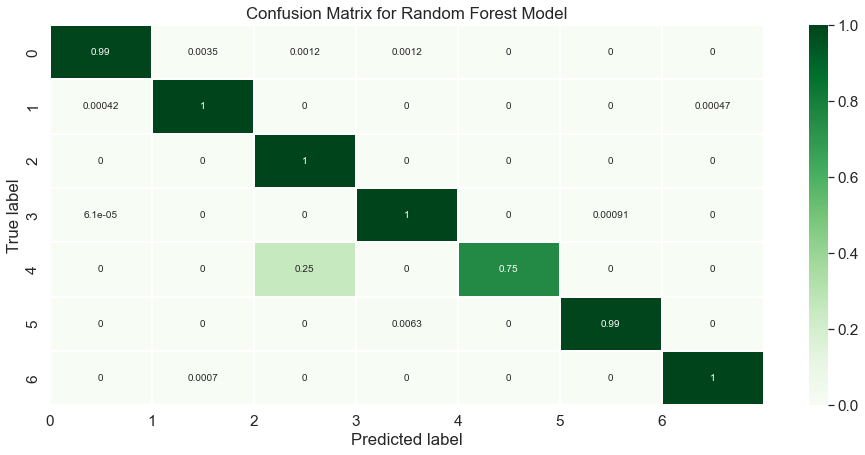

In [32]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1', '2', '3', '4', '5', '6']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1737
           1       1.00      1.00      1.00     21500
           2       1.00      1.00      1.00     11377
           3       1.00      1.00      1.00     16430
           4       1.00      0.75      0.86         4
           5       1.00      0.99      0.99      3827
           6       1.00      1.00      1.00     11375

    accuracy                           1.00     66250
   macro avg       1.00      0.96      0.98     66250
weighted avg       1.00      1.00      1.00     66250



In [ ]:
# class it was havieng most difficulty predicting is '4'. 
# understandable as only 4 examples in the test set.
# however may be improved with class balancing.